## This notebook analyses several special cases examples

In [119]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt

In [120]:
df_pop = pd.read_csv('input_data/covid_county_population_usafacts.csv')
df_deaths = pd.read_csv('input_data/covid_deaths_usafacts.csv')
df_cases = pd.read_csv('input_data/covid_confirmed_usafacts.csv')
df_vax = pd.read_csv('input_data/COVID-19_Vaccinations_in_the_United_States_County.csv')

In [223]:
def days_of_months_printer(month, no_days, year=2022):
    month = "0" * (2-len(str(month))) + str(month)
    list_of_days = list()
    for i in range(1, no_days+1):
        list_of_days.append(month + "/" + "0" * (2-len(str(i))) + str(i) + "/" + str(year))
    return list_of_days

def days_of_months_printer_ww(month, no_days, year=2022):
    month = "0" * (2-len(str(month))) + str(month)
    list_of_days = list()
    for i in range(1, no_days+1):
        list_of_days.append(str(year) + "-" + month + "-" + "0" * (2-len(str(i))) + str(i))
    return list_of_days

### Blaine County, Twin Falls County, Ada County

In [375]:
counties_to_analyse = ['Blaine County', 'Twin Falls County', 'Ada County']
fips_to_analyse = [16013, 16083, 16001]

In [376]:
days = days_of_months_printer(1, 31) + days_of_months_printer(2, 28) + days_of_months_printer(3, 22)
lst_filter_vax = []
for fips in fips_to_analyse:
    fips_f = '0' * (5 - len(str(fips))) + str(fips)
    lst_filter_vax.extend(df_vax.loc[(df_vax['FIPS'] == fips_f) & (df_vax['Date'].isin(days))].values.tolist())

In [377]:
df_filter_vax = pd.DataFrame(lst_filter_vax, columns = df_vax.columns)
df_filter_vax

,Date,FIPS,MMWR_week,Recip_County,Recip_State,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_5Plus,Administered_Dose1_Recip_5PlusPop_Pct,...,Booster_Doses_Vax_Pct_UR_Equity,Booster_Doses_12PlusVax_Pct_UR_Equity,Booster_Doses_18PlusVax_Pct_UR_Equity,Booster_Doses_65PlusVax_Pct_UR_Equity,Census2019,Census2019_5PlusPop,Census2019_5to17Pop,Census2019_12PlusPop,Census2019_18PlusPop,Census2019_65PlusPop
0,03/22/2022,16013,12,Blaine County,ID,97.8,21501.0,93.4,21500.0,95.0,...,NaN,NaN,NaN,NaN,23021.0,21922.0,NaN,20109.0,18163.0,4683.0
1,03/21/2022,16013,12,Blaine County,ID,97.8,21499.0,93.4,21498.0,95.0,...,NaN,NaN,NaN,NaN,23021.0,21922.0,NaN,20109.0,18163.0,4683.0
2,03/20/2022,16013,12,Blaine County,ID,97.8,21499.0,93.4,21498.0,95.0,...,NaN,NaN,NaN,NaN,23021.0,21922.0,NaN,20109.0,18163.0,4683.0
3,03/19/2022,16013,11,Blaine County,ID,97.8,21497.0,93.4,21496.0,95.0,...,NaN,NaN,NaN,NaN,23021.0,21922.0,NaN,20109.0,18163.0,4683.0
4,03/18/2022,16013,11,Blaine County,ID,97.8,21492.0,93.4,21491.0,95.0,...,NaN,NaN,NaN,NaN,23021.0,21922.0,NaN,20109.0,18163.0,4683.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,01/05/2022,16001,1,Ada County,ID,97.6,289931.0,60.2,NaN,NaN,...,NaN,NaN,NaN,NaN,481587.0,454456.0,NaN,410672.0,369857.0,71958.0
239,01/04/2022,16001,1,Ada County,ID,97.6,289745.0,60.2,NaN,NaN,...,NaN,NaN,NaN,NaN,481587.0,454456.0,NaN,410672.0,369857.0,71958.0
240,01/03/2022,16001,1,Ada County,ID,97.6,289299.0,60.1,NaN,NaN,...,NaN,NaN,NaN,NaN,481587.0,454456.0,NaN,410672.0,369857.0,71958.0
241,01/02/2022,16001,0,Ada County,ID,97.6,289286.0,60.1,NaN,NaN,...,NaN,NaN,NaN,NaN,481587.0,454456.0,NaN,410672.0,369857.0,71958.0


In [125]:
days = days_of_months_printer_ww(1, 31) + days_of_months_printer_ww(2, 28) + days_of_months_printer_ww(3, 22)
col_relevant = ['countyFIPS', 'County Name', 'State'] + days
df_filter_cases = df_cases.loc[(df_cases['countyFIPS'].isin(fips_to_analyse))][col_relevant]

In [126]:
df_filter_cases

,countyFIPS,County Name,State,2022-01-01,2022-01-02,2022-01-03,2022-01-04,2022-01-05,2022-01-06,2022-01-07,...,2022-03-13,2022-03-14,2022-03-15,2022-03-16,2022-03-17,2022-03-18,2022-03-19,2022-03-20,2022-03-21,2022-03-22
564,16001,Ada County,ID,89225,89225,89225,90151,90630,91092,91221,...,131990,132050,132164,132307,132488,132599,132599,132599,132727,132836
570,16013,Blaine County,ID,3540,3540,3540,3713,3780,3953,4025,...,5750,5806,5841,5894,5909,5930,5930,5930,5939,5944
605,16083,Twin Falls County,ID,17042,17042,17042,17119,17185,17294,17337,...,22960,23334,23492,23663,23730,23823,23823,23823,23940,23967


In [127]:
#Blaine
population = df_pop.loc[df_pop['countyFIPS'] == 16013]['population'].values[0]
vax_full = list(df_filter_vax.loc[df_filter_vax['FIPS'] == '16013']['Series_Complete_Pop_Pct'])
vax_full = list(reversed(vax_full))
cases_per_capita = list(df_filter_cases.loc[df_filter_cases['countyFIPS'] == 16013][days].values[0])

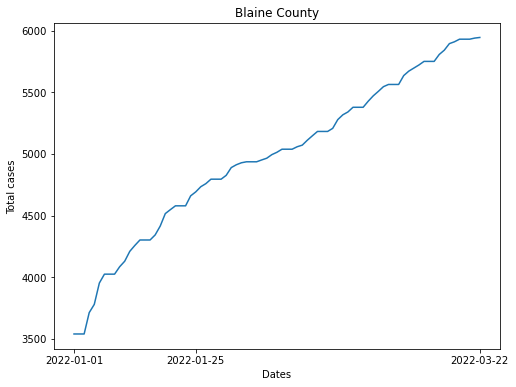

In [128]:
plt.title("Blaine County")
plt.ylabel("Total cases")
plt.xlabel("Dates")
plt.plot(days,cases_per_capita)
plt.xticks(['2022-01-01', '2022-01-25', '2022-03-22'])
plt.show()

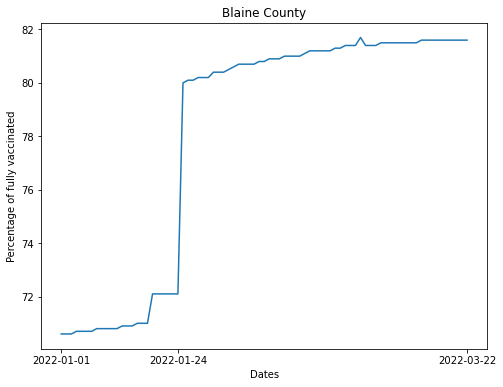

In [129]:
plt.title("Blaine County")
plt.ylabel("Percentage of fully vaccinated")
plt.xlabel("Dates")
plt.plot(days,vax_full)
plt.xticks(['2022-01-01', '2022-01-24', '2022-03-22'])
plt.show()

In [130]:
#Twin Falls County
population = df_pop.loc[df_pop['countyFIPS'] == 16083]['population'].values[0]
vax_full = list(df_filter_vax.loc[df_filter_vax['FIPS'] == '16083']['Series_Complete_Pop_Pct'])
vax_full = list(reversed(vax_full))
cases_per_capita = list(df_filter_cases.loc[df_filter_cases['countyFIPS'] == 16083][days].values[0])

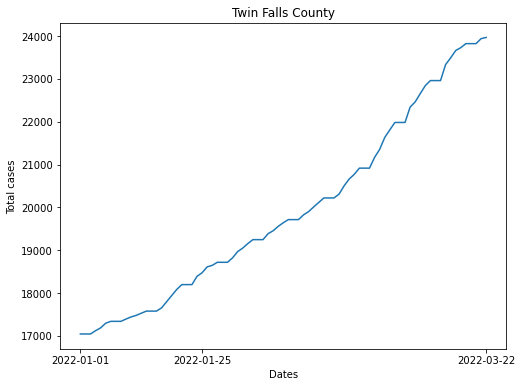

In [131]:
plt.title("Twin Falls County")
plt.ylabel("Total cases")
plt.xlabel("Dates")
plt.plot(days,cases_per_capita)
plt.xticks(['2022-01-01', '2022-01-25', '2022-03-22'])
plt.show()

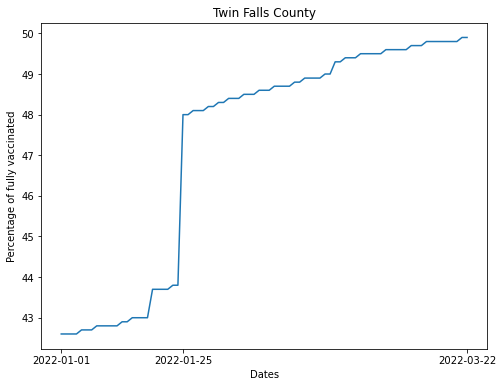

In [132]:
plt.title("Twin Falls County")
plt.ylabel("Percentage of fully vaccinated")
plt.xlabel("Dates")
plt.plot(days,vax_full)
plt.xticks(['2022-01-01', '2022-01-25', '2022-03-22'])
plt.show()

In [133]:
#Ada County
population = df_pop.loc[df_pop['countyFIPS'] == 16001]['population'].values[0]
vax_full = list(df_filter_vax.loc[df_filter_vax['FIPS'] == '16001']['Series_Complete_Pop_Pct'])
vax_full = list(reversed(vax_full))
cases_per_capita = list(df_filter_cases.loc[df_filter_cases['countyFIPS'] == 16001][days].values[0])

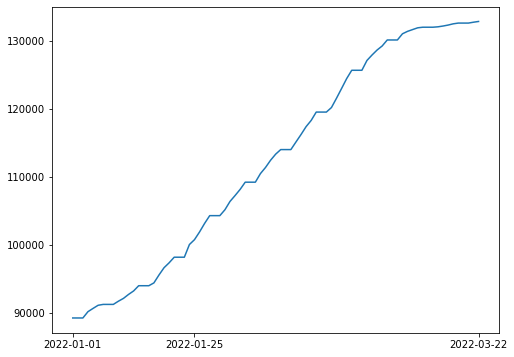

In [134]:
plt.plot(days,cases_per_capita)
plt.xticks(['2022-01-01', '2022-01-25', '2022-03-22'])
plt.show()

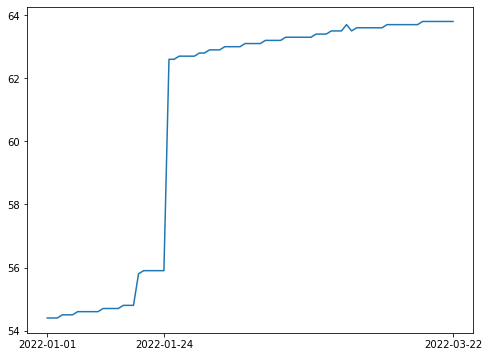

In [135]:
plt.plot(days,vax_full)
plt.xticks(['2022-01-01', '2022-01-24', '2022-03-22'])
plt.show()

### Charlottesville and Albemarle counties

In [378]:
counties_to_analyse = ['Charlottesville County', 'Albemarle County']
fips_to_analyse = [51540, 51003]

In [390]:
days = days_of_months_printer_ww(1, 31) + days_of_months_printer_ww(2, 28) + days_of_months_printer_ww(3, 31) + days_of_months_printer_ww(4, 8)
col_relevant = ['countyFIPS', 'County Name', 'State'] + days
df_filter_cases = df_cases.loc[(df_cases['countyFIPS'].isin(fips_to_analyse))][col_relevant]
df_filter_cases

,countyFIPS,County Name,State,2022-01-01,2022-01-02,2022-01-03,2022-01-04,2022-01-05,2022-01-06,2022-01-07,...,2022-03-30,2022-03-31,2022-04-01,2022-04-02,2022-04-03,2022-04-04,2022-04-05,2022-04-06,2022-04-07,2022-04-08
2868,51003,Albemarle County,VA,9744,9744,10094,10219,10299,10455,10586,...,16361,16423,16533,16533,16533,16693,16784,16885,16885,16885
2965,51540,City of Charlottesville,VA,6225,6225,6437,6518,6569,6683,6823,...,9917,9881,9791,9791,9791,9726,9679,9575,9575,9575


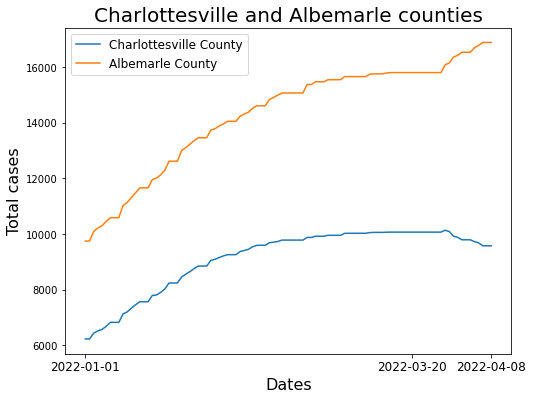

In [391]:
for idx, f in enumerate(fips_to_analyse):
    population = df_pop.loc[df_pop['countyFIPS'] == f]['population'].values[0]
    cases = list(df_filter_cases.loc[df_filter_cases['countyFIPS'] == f][days].values[0])
    cases_per_capita = list(df_filter_cases.loc[df_filter_cases['countyFIPS'] == f][days].values[0]/float(df_pop.loc[(df_pop['countyFIPS'].isin([f]))]['population']))
    plt.plot(days,cases, label=counties_to_analyse[idx])
plt.title("Charlottesville and Albemarle counties", fontsize=20)
plt.ylabel("Total cases", fontsize=16)
plt.xlabel("Dates", fontsize=16)
plt.xticks(['2022-01-01', '2022-03-20', '2022-04-08'], fontsize=12)
plt.legend(fontsize=12)
#plt.rcParams["figure.figsize"] = (14,9)
plt.rcParams["figure.figsize"] = (8,6)
plt.show()

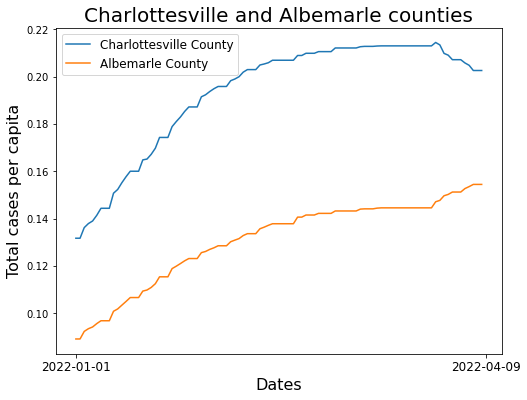

In [392]:
for idx, f in enumerate(fips_to_analyse):
    population = df_pop.loc[df_pop['countyFIPS'] == f]['population'].values[0]
    cases = list(df_filter_cases.loc[df_filter_cases['countyFIPS'] == f][days].values[0])
    cases_per_capita = list(df_filter_cases.loc[df_filter_cases['countyFIPS'] == f][days].values[0]/float(df_pop.loc[(df_pop['countyFIPS'].isin([f]))]['population']))
    plt.plot(days,cases_per_capita, label=counties_to_analyse[idx])
plt.title("Charlottesville and Albemarle counties", fontsize=20)
plt.ylabel("Total cases per capita", fontsize=16)
plt.xlabel("Dates", fontsize=16)
plt.xticks(['2022-01-01', '2022-04-09'], fontsize=12)
plt.legend(fontsize=12)
#plt.rcParams["figure.figsize"] = (14,9)
plt.rcParams["figure.figsize"] = (8,6)
plt.show()

In [425]:
days = days_of_months_printer(11, 30, 2021)[14:] + days_of_months_printer(12, 31, 2021) + days_of_months_printer(1, 31) + days_of_months_printer(2, 28) + days_of_months_printer(3, 31) + days_of_months_printer(4, 8)
#days = days_of_months_printer(1, 31)
lst_filter_vax = []
for fips in fips_to_analyse:
    fips_f = '0' * (5 - len(str(fips))) + str(fips)
    lst_filter_vax.extend(df_vax.loc[(df_vax['FIPS'] == fips_f) & (df_vax['Date'].isin(days))].values.tolist())

In [426]:
df_filter_vax = pd.DataFrame(lst_filter_vax, columns = df_vax.columns)

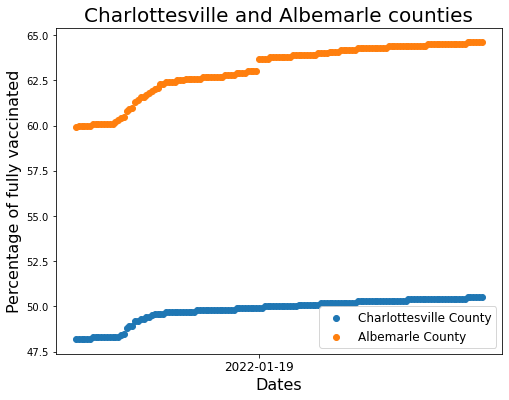

In [427]:
days = days_of_months_printer_ww(11, 30, 2021)[14:] + days_of_months_printer_ww(12, 31, 2021) + days_of_months_printer_ww(1, 31) + days_of_months_printer_ww(2, 28) + days_of_months_printer_ww(3, 31) + days_of_months_printer_ww(4, 8)
#days = days_of_months_printer_ww(1, 31)
for idx, f in enumerate(fips_to_analyse):
    population = df_pop.loc[df_pop['countyFIPS'] == f]['population'].values[0]
    vax_full = list(df_filter_vax.loc[df_filter_vax['FIPS'] == str(f)]['Series_Complete_Pop_Pct'])
    vax_full = list(reversed(vax_full))
    plt.scatter(days,vax_full, label=counties_to_analyse[idx])
plt.title("Charlottesville and Albemarle counties", fontsize=20)
plt.ylabel("Percentage of fully vaccinated", fontsize=16)
plt.xlabel("Dates", fontsize=16)
#plt.xticks(['2021-11-15', '2022-01-01', '2022-04-09'], fontsize=12)
plt.xticks(['2022-01-19'], fontsize=12)
plt.legend(fontsize=12)
#plt.rcParams["figure.figsize"] = (14,9)
plt.rcParams["figure.figsize"] = (8,6)
plt.show()

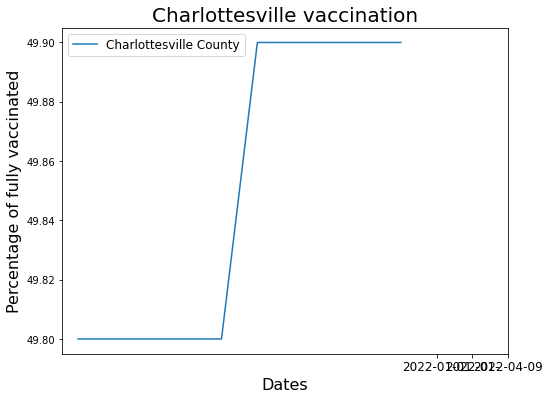

In [387]:
population = df_pop.loc[df_pop['countyFIPS'] == fips_to_analyse[0]]['population'].values[0]
vax_full = list(df_filter_vax.loc[df_filter_vax['FIPS'] == str(fips_to_analyse[0])]['Series_Complete_Pop_Pct'])
vax_full = list(reversed(vax_full))
cases_per_capita = list(df_filter_cases.loc[df_filter_cases['countyFIPS'] == fips_to_analyse[0]][days].values[0])
plt.plot(days,vax_full, label=counties_to_analyse[0])
plt.title("Charlottesville vaccination", fontsize=20)
plt.ylabel("Percentage of fully vaccinated", fontsize=16)
plt.xlabel("Dates", fontsize=16)
plt.xticks(['2022-01-01', '2022-01-', '2022-04-09'], fontsize=12)
plt.legend(fontsize=12)
plt.rcParams["figure.figsize"] = (8,6)
plt.show()

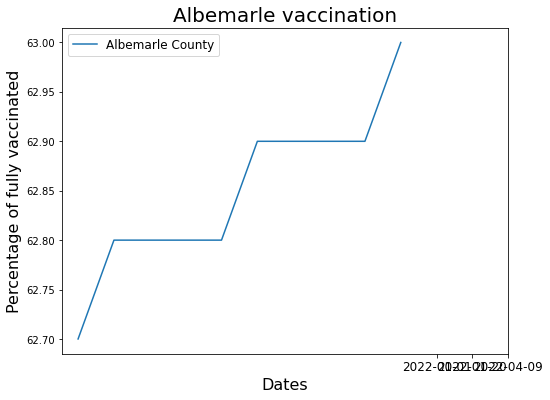

In [388]:
population = df_pop.loc[df_pop['countyFIPS'] == fips_to_analyse[1]]['population'].values[0]
vax_full = list(df_filter_vax.loc[df_filter_vax['FIPS'] == str(fips_to_analyse[1])]['Series_Complete_Pop_Pct'])
vax_full = list(reversed(vax_full))
cases_per_capita = list(df_filter_cases.loc[df_filter_cases['countyFIPS'] == fips_to_analyse[1]][days].values[0])
plt.plot(days,vax_full, label=counties_to_analyse[1])
plt.title("Albemarle vaccination", fontsize=20)
plt.ylabel("Percentage of fully vaccinated", fontsize=16)
plt.xlabel("Dates", fontsize=16)
plt.xticks(['2022-01-01', '2022-01-20', '2022-04-09'], fontsize=12)
plt.legend(fontsize=12)
plt.rcParams["figure.figsize"] = (8,6)
plt.show()

#### Day by day [daily increase of cases] from 21th March 2022 to 8th April 2022

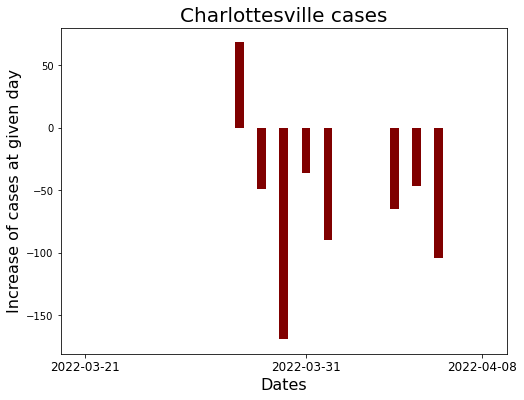

In [218]:
days = days_of_months_printer_ww(3, 31)[19:] + days_of_months_printer_ww(4, 8)
y_charlottesville =  list(df_filter_cases.loc[df_filter_cases['countyFIPS'] == fips_to_analyse[0]][days].values[0])
y_charlottesville = [j-i for i, j in zip(y_charlottesville[:-1], y_charlottesville[1:])]
days = days[1:]
plt.bar(days, y_charlottesville, color ='maroon', width = 0.4)
plt.title("Charlottesville cases", fontsize=20)
plt.ylabel("Increase of cases at given day", fontsize=16)
plt.xlabel("Dates", fontsize=16)
plt.xticks(['2022-03-21', '2022-03-31', '2022-04-08'], fontsize=12)
#plt.legend(fontsize=12)
plt.rcParams["figure.figsize"] = (8,6)
plt.show()
#df_filter_cases.loc[df_filter_cases['countyFIPS'] == fips_to_analyse[0]][days]

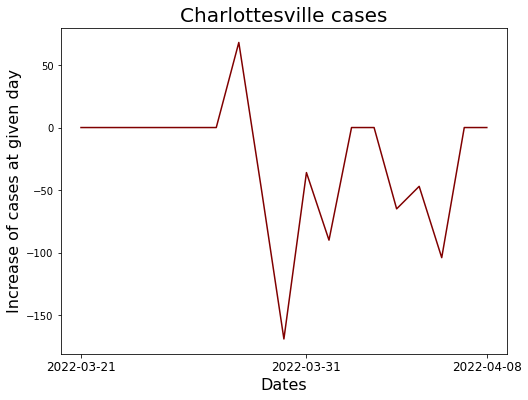

In [217]:
plt.plot(days, y_charlottesville, color ='maroon')
plt.title("Charlottesville cases", fontsize=20)
plt.ylabel("Increase of cases at given day", fontsize=16)
plt.xlabel("Dates", fontsize=16)
plt.xticks(['2022-03-21', '2022-03-31', '2022-04-08'], fontsize=12)
#plt.legend(fontsize=12)
plt.rcParams["figure.figsize"] = (8,6)
plt.show()

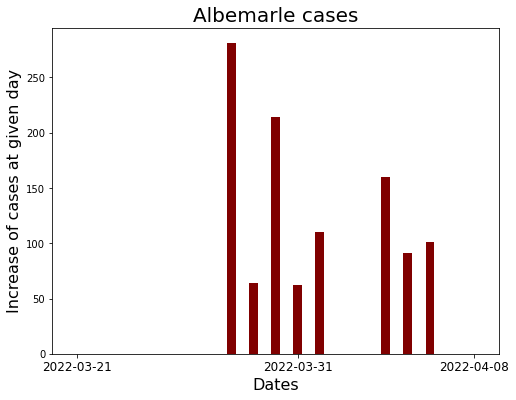

In [219]:
days = days_of_months_printer_ww(3, 31)[19:] + days_of_months_printer_ww(4, 8)
y_albemarle =  list(df_filter_cases.loc[df_filter_cases['countyFIPS'] == fips_to_analyse[1]][days].values[0])
y_albemarle = [j-i for i, j in zip(y_albemarle[:-1], y_albemarle[1:])]
days = days[1:]
plt.bar(days, y_albemarle, color ='maroon', width = 0.4)
plt.title("Albemarle cases", fontsize=20)
plt.ylabel("Increase of cases at given day", fontsize=16)
plt.xlabel("Dates", fontsize=16)
plt.xticks(['2022-03-21', '2022-03-31', '2022-04-08'], fontsize=12)
#plt.legend(fontsize=12)
plt.rcParams["figure.figsize"] = (8,6)
plt.show()
#df_filter_cases.loc[df_filter_cases['countyFIPS'] == fips_to_analyse[0]][days]

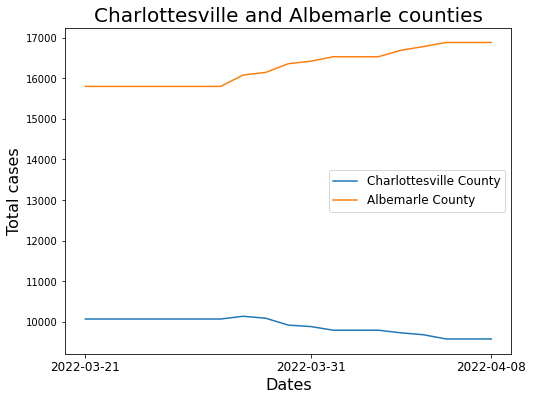

In [221]:
for idx, f in enumerate(fips_to_analyse):
    population = df_pop.loc[df_pop['countyFIPS'] == f]['population'].values[0]
    vax_full = list(df_filter_vax.loc[df_filter_vax['FIPS'] == str(f)]['Series_Complete_Pop_Pct'])
    vax_full = list(reversed(vax_full))
    cases = list(df_filter_cases.loc[df_filter_cases['countyFIPS'] == f][days].values[0])
    cases_per_capita = list(df_filter_cases.loc[df_filter_cases['countyFIPS'] == f][days].values[0]/float(df_pop.loc[(df_pop['countyFIPS'].isin([f]))]['population']))
    plt.plot(days,cases, label=counties_to_analyse[idx])
plt.title("Charlottesville and Albemarle counties", fontsize=20)
plt.ylabel("Total cases", fontsize=16)
plt.xlabel("Dates", fontsize=16)
plt.xticks(['2022-03-21', '2022-03-31', '2022-04-08'], fontsize=12)
plt.legend(fontsize=12)
#plt.rcParams["figure.figsize"] = (14,9)
plt.rcParams["figure.figsize"] = (8,6)
plt.show()

Charlottesville (same plot as in https://dailyprogress.com/news/local/some-covid-19-case-data-in-albemarle-charlottesville-area-is-misleading/article_b3253650-b458-11ec-a266-d39efc6fea97.html)

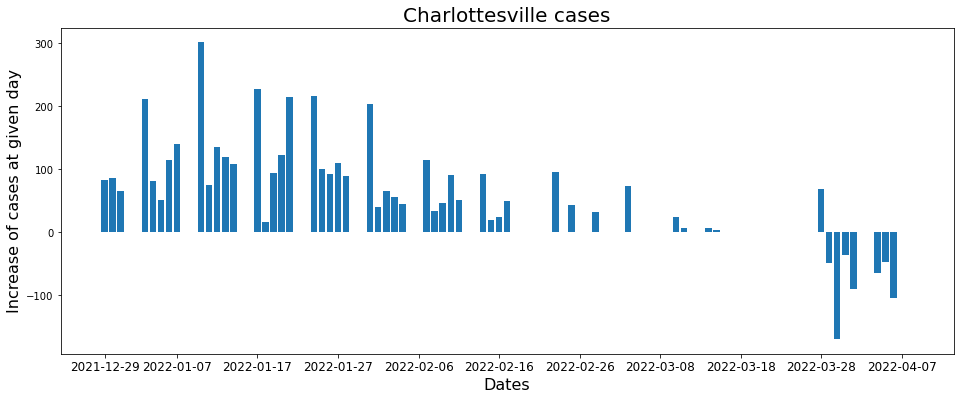

In [352]:
counties_to_analyse = ['Charlottesville County']
fips_to_analyse = [51540]
# counties_to_analyse = ['Blaine County', 'Twin Falls County', 'Albemarle County']
# fips_to_analyse = [16013, 16083, 51003]
col_relevant = ['countyFIPS', 'County Name', 'State'] + days
df_filter_cases = df_cases.loc[(df_cases['countyFIPS'].isin(fips_to_analyse))][col_relevant]
days = days_of_months_printer_ww(12, 31, 2021)[27:] +  days_of_months_printer_ww(1, 31) + days_of_months_printer_ww(2, 28) + days_of_months_printer_ww(3, 31) + days_of_months_printer_ww(4, 8)
y_charlottesville =  list(df_filter_cases.loc[df_filter_cases['countyFIPS'] == fips_to_analyse[0]][days].values[0])
y_charlottesville = [j-i for i, j in zip(y_charlottesville[:-1], y_charlottesville[1:])]
y_charlottesville_mod = []
days = days[1:]
plt.bar(days, y_charlottesville)
plt.title("Charlottesville cases", fontsize=20)
plt.ylabel("Increase of cases at given day", fontsize=16)
plt.xlabel("Dates", fontsize=16)
plt.xticks(['2021-12-29','2022-01-07','2022-01-17','2022-01-27','2022-02-06','2022-02-16','2022-02-26', '2022-03-08', '2022-03-18', '2022-03-28', '2022-04-07'], fontsize=12)
#plt.legend(fontsize=12)
plt.rcParams["figure.figsize"] = (16,6)
plt.show()
#df_filter_cases.loc[df_filter_cases['countyFIPS'] == fips_to_analyse[0]][days]

In [335]:
df_filter_cases

,countyFIPS,County Name,State,2021-12-28,2021-12-29,2021-12-30,2021-12-31,2022-01-01,2022-01-02,2022-01-03,...,2022-03-30,2022-03-31,2022-04-01,2022-04-02,2022-04-03,2022-04-04,2022-04-05,2022-04-06,2022-04-07,2022-04-08
2965,51540,City of Charlottesville,VA,5990,6073,6159,6225,6225,6225,6437,...,9917,9881,9791,9791,9791,9726,9679,9575,9575,9575


Blaine County (day by day)

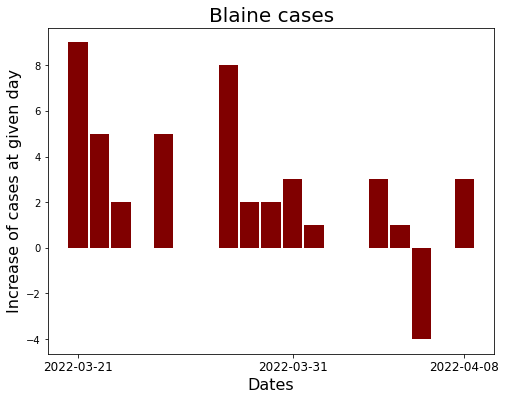

In [338]:
counties_to_analyse = ['Blaine County']
fips_to_analyse = [16013]
col_relevant = ['countyFIPS', 'County Name', 'State'] + days
df_filter_cases = df_cases.loc[(df_cases['countyFIPS'].isin(fips_to_analyse))][col_relevant]
days = days_of_months_printer_ww(3, 31)[19:] + days_of_months_printer_ww(4, 8)
y_blaine =  list(df_filter_cases.loc[df_filter_cases['countyFIPS'] == fips_to_analyse[0]][days].values[0])
y_blaine = [j-i for i, j in zip(y_blaine[:-1], y_blaine[1:])]
days = days[1:]
plt.bar(days, y_blaine, color ='maroon', width = 0.9)
plt.title("Blaine cases", fontsize=20)
plt.ylabel("Increase of cases at given day", fontsize=16)
plt.xlabel("Dates", fontsize=16)
plt.xticks(['2022-03-21', '2022-03-31', '2022-04-08'], fontsize=12)
#plt.legend(fontsize=12)
plt.rcParams["figure.figsize"] = (8,6)
plt.show()
#df_filter_cases.loc[df_filter_cases['countyFIPS'] == fips_to_analyse[0]][days]

In [269]:
df_filter_cases

,countyFIPS,County Name,State,2022-03-20,2022-03-21,2022-03-22,2022-03-23,2022-03-24,2022-03-25,2022-03-26,...,2022-03-30,2022-03-31,2022-04-01,2022-04-02,2022-04-03,2022-04-04,2022-04-05,2022-04-06,2022-04-07,2022-04-08
570,16013,Blaine County,ID,5930,5939,5944,5946,5946,5951,5951,...,5963,5966,5967,5967,5967,5970,5971,5967,5967,5970
